#Snake Identifier


## Importing Libraries and Data

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import glob
import cv2
from skimage.transform import resize
from sklearn.model_selection import train_test_split
LE = LabelEncoder()

In [6]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
BASE_PATH ="/content/drive/MyDrive/data"

- Loading dataframe

In [29]:
path = BASE_PATH+"/test/data.csv"
df = pd.read_csv(path)
# Dataset is now stored in a Pandas Dataframe
df['breed_encode'] = LE.fit_transform(df['breed'])

## Data exploration

- Main dataframe:

In [ ]:
df.head()

,image_id,breed,breed_encode
0,a8b3ad1dde,nerodia-erythrogaster,15
1,8b492b973d,pantherophis-vulpinus,25
2,929b99ea92,thamnophis-sirtalis,34
3,bbac7385e2,pantherophis-obsoletus,23
4,ef776b1488,agkistrodon-contortrix,0


- Data Size

In [ ]:
df.shape

(20865, 3)

- Breeds:

In [ ]:
print(pd.unique(df['breed']));
print("Total breeds",len ( pd.unique(df['breed'])));

['nerodia-erythrogaster' 'pantherophis-vulpinus' 'thamnophis-sirtalis'
 'pantherophis-obsoletus' 'agkistrodon-contortrix' 'crotalus-atrox'
 'lampropeltis-triangulum' 'crotalus-horridus' 'crotalus-ruber'
 'heterodon-platirhinos' 'nerodia-sipedon' 'thamnophis-elegans'
 'thamnophis-marcianus' 'crotalus-viridis' 'nerodia-fasciata'
 'haldea-striatula' 'storeria-dekayi' 'agkistrodon-piscivorus'
 'nerodia-rhombifer' 'storeria-occipitomaculata' 'thamnophis-radix'
 'coluber-constrictor' 'natrix-natrix' 'diadophis-punctatus'
 'masticophis-flagellum' 'pantherophis-spiloides' 'rhinocheilus-lecontei'
 'lampropeltis-californiae' 'pituophis-catenifer' 'opheodrys-aestivus'
 'pantherophis-guttatus' 'pantherophis-alleghaniensis'
 'thamnophis-proximus' 'pantherophis-emoryi' 'crotalus-scutulatus']
Total breeds 35


- Total images for each breed : 

In [ ]:
print(df['breed'].value_counts())

thamnophis-sirtalis            972
storeria-dekayi                883
crotalus-atrox                 837
pantherophis-obsoletus         813
pituophis-catenifer            735
lampropeltis-triangulum        698
nerodia-sipedon                691
agkistrodon-contortrix         644
diadophis-punctatus            631
agkistrodon-piscivorus         631
pantherophis-alleghaniensis    616
nerodia-erythrogaster          616
lampropeltis-californiae       611
opheodrys-aestivus             609
coluber-constrictor            591
heterodon-platirhinos          586
pantherophis-guttatus          580
crotalus-horridus              577
natrix-natrix                  573
masticophis-flagellum          553
haldea-striatula               550
storeria-occipitomaculata      540
nerodia-rhombifer              536
thamnophis-proximus            536
rhinocheilus-lecontei          527
crotalus-scutulatus            503
crotalus-ruber                 503
thamnophis-radix               501
pantherophis-vulpinu

- Datad density:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


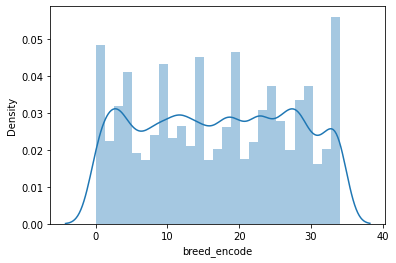

In [ ]:
sns.distplot(df['breed_encode']);

- Histogram:

(array([2703., 1583., 2225., 1862., 1644., 2452., 1853., 2244., 1861.,
        2438.]),
 array([ 0. ,  3.4,  6.8, 10.2, 13.6, 17. , 20.4, 23.8, 27.2, 30.6, 34. ]),
 <a list of 10 Patch objects>)

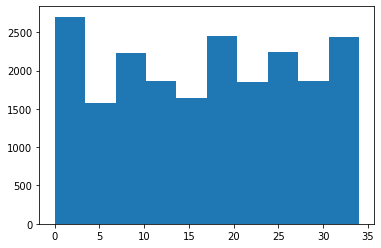

In [ ]:
plt.hist(df['breed_encode'])

## Training:

-X and Y 

In [30]:
def getX():
  x =np.zeros((len(df['image_id']),224,224,3))
  
  for i,image_id in enumerate(df['image_id']):
    #Get path with image_id
    path  = BASE_PATH+"/test/data/"+image_id+".*"
    #Search path
    route = glob.glob(path,recursive=False)
    if len(route) <= 0:
      print("Path not found")
      print(path)
      break
    #Get img data
    img = cv2.imread(route[0])
    #Resize and save in x
    x[i,:,:,:] =resize(image = img, output_shape = [224,224,3], anti_aliasing=True)
  return x  

In [37]:
Y=df['breed']

In [39]:
#This cell may take several minutes
X = getX()

-Example:

pantherophis-obsoletus


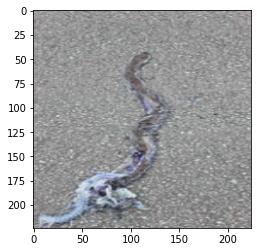

In [40]:
i = np.random.randint(len(df['breed']))
print(Y[i])
plt.imshow(X[i])

- Split data

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.20)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print("\nDistribution of train classes")
print(pd.Series(y_train).value_counts())
print("\nDistribution of test classes")
print(pd.Series(y_test).value_counts())

(16, 224, 224, 3) (16,) (4, 224, 224, 3) (4,)

Distribution of train classes
thamnophis-elegans        2
thamnophis-sirtalis       2
pantherophis-obsoletus    1
thamnophis-marcianus      1
agkistrodon-piscivorus    1
crotalus-ruber            1
nerodia-fasciata          1
nerodia-sipedon           1
pantherophis-vulpinus     1
nerodia-rhombifer         1
agkistrodon-contortrix    1
nerodia-erythrogaster     1
haldea-striatula          1
crotalus-atrox            1
Name: breed, dtype: int64

Distribution of test classes
storeria-dekayi          1
thamnophis-sirtalis      1
heterodon-platirhinos    1
crotalus-atrox           1
Name: breed, dtype: int64
